In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk 
import re
import string
from subprocess import call
from sklearn.datasets import [load_iris]
from sklearn.tree import export_graphviz
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score,  precision_score, recall_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn import feature_extraction, model_selection, naive_bayes, metrics, svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from collections import Counter
from IPython.display import Image
from sklearn.tree import DecisionTreeClassifier
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##Preprocessing

In [ ]:
df = pd.read_csv("/content/drive/My Drive/Spam Email Detection Project/spamdata.csv", encoding='latin-1')
df.head(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
df.tail(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ã_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [ ]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [ ]:
df.shape

(5572, 5)

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.shape

(5169, 5)

In [ ]:
df.dropna()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
281,ham,\Wen u miss someone,the person is definitely special for u..... B...,why to miss them,"just Keep-in-touch\"" gdeve.."""
1038,ham,"Edison has rightly said, \A fool can ask more ...",GN,GE,"GNT:-)"""
2255,ham,I just lov this line: \Hurt me with the truth,I don't mind,i wil tolerat.bcs ur my someone..... But,"Never comfort me with a lie\"" gud ni8 and swe..."
3525,ham,\HEY BABE! FAR 2 SPUN-OUT 2 SPK AT DA MO... DE...,HAD A COOL NYTHO,TX 4 FONIN HON,"CALL 2MWEN IM BK FRMCLOUD 9! J X\"""""
4668,ham,"When I was born, GOD said, \Oh No! Another IDI...",GOD said,"\""OH No! COMPETITION\"". Who knew","one day these two will become FREINDS FOREVER!"""


In [ ]:
df.head(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
df.tail(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ã_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [ ]:
df.shape

(5169, 5)

In [ ]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [ ]:
df = df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],axis=1)

In [ ]:
df.columns

Index(['v1', 'v2'], dtype='object')

In [ ]:
df.isnull().sum()

v1    0
v2    0
dtype: int64

In [ ]:
df.isnull()

,v1,v2
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
5567,False,False
5568,False,False
5569,False,False
5570,False,False


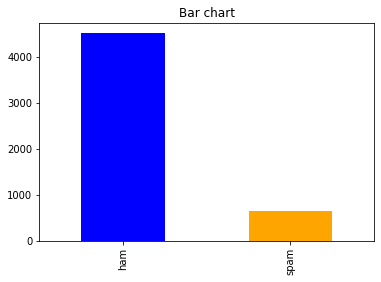

In [ ]:
count_Class = pd.value_counts(df["v1"], sort= True)
count_Class.plot(kind= 'bar', color= ["blue", "orange"])
plt.title('Bar chart')
plt.show()

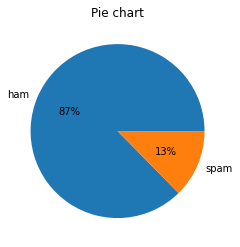

In [ ]:
count_Class.plot(kind = 'pie',  autopct='%1.0f%%')
plt.title('Pie chart')
plt.ylabel('')
plt.show()

In [ ]:
count1 = Counter(" ".join(df[df['v1']=='ham']["v2"]).split()).most_common(20)
df1 = pd.DataFrame.from_dict(count1)
df1 = df1.rename(columns={0: "words in non-spam", 1 : "count"})

count2 = Counter(" ".join(df[df['v1']=='spam']["v2"]).split()).most_common(20)
df2 = pd.DataFrame.from_dict(count2)
df2 = df2.rename(columns={0: "words in spam", 1 : "count_"})

In [ ]:
count1

[('to', 1450),
 ('you', 1412),
 ('I', 1349),
 ('the', 954),
 ('a', 884),
 ('i', 714),
 ('and', 712),
 ('in', 677),
 ('u', 576),
 ('my', 570),
 ('is', 561),
 ('me', 513),
 ('for', 452),
 ('of', 452),
 ('that', 387),
 ('it', 357),
 ('your', 346),
 ('have', 337),
 ('on', 334),
 ('at', 316)]

In [ ]:
count2

[('to', 522),
 ('a', 314),
 ('your', 171),
 ('call', 163),
 ('the', 160),
 ('or', 155),
 ('for', 152),
 ('2', 151),
 ('you', 150),
 ('is', 130),
 ('Call', 116),
 ('on', 112),
 ('have', 110),
 ('from', 109),
 ('and', 102),
 ('&', 89),
 ('with', 86),
 ('ur', 86),
 ('of', 79),
 ('FREE', 75)]

In [ ]:
df1

,words in non-spam,count
0,to,1450
1,you,1412
2,I,1349
3,the,954
4,a,884
5,i,714
6,and,712
7,in,677
8,u,576
9,my,570


In [ ]:
df2

,words in spam,count_
0,to,522
1,a,314
2,your,171
3,call,163
4,the,160
5,or,155
6,for,152
7,2,151
8,you,150
9,is,130


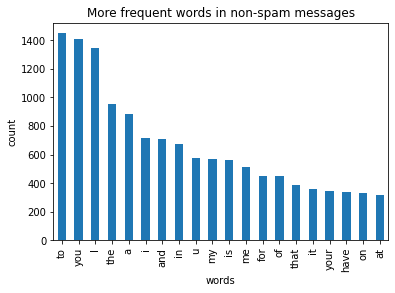

In [ ]:
df1.plot.bar(legend = False)
y_pos = np.arange(len(df1["words in non-spam"]))
plt.xticks(y_pos, df1["words in non-spam"])
plt.title('More frequent words in non-spam messages')
plt.xlabel('words')
plt.ylabel('count')
plt.show()

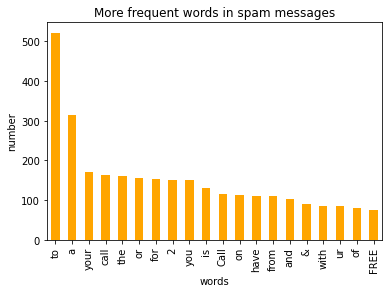

In [ ]:
df2.plot.bar(legend = False, color = 'orange')
y_pos = np.arange(len(df2["words in spam"]))
plt.xticks(y_pos, df2["words in spam"])
plt.title('More frequent words in spam messages')
plt.xlabel('words')
plt.ylabel('number')
plt.show()

##Feature Extraction

In [ ]:
def process_text(text):
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    clean_words = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    return clean_words

In [ ]:
f = CountVectorizer(analyzer=process_text, ngram_range=(1,1))
X = f.fit_transform(df["v2"])
features_names = (f.get_feature_names())
print(np.shape(X))
print(X)
print(X.toarray())

(5169, 11302)
  (0, 2029)	1
  (0, 7454)	1
  (0, 8807)	1
  (0, 5686)	1
  (0, 1098)	1
  (0, 5137)	1
  (0, 8229)	1
  (0, 6847)	1
  (0, 11041)	1
  (0, 7565)	1
  (0, 6132)	1
  (0, 5136)	1
  (0, 1463)	1
  (0, 6816)	1
  (0, 4575)	1
  (0, 10843)	1
  (1, 3014)	1
  (1, 7598)	1
  (1, 2409)	1
  (1, 10950)	1
  (1, 10580)	1
  (1, 8480)	1
  (2, 1911)	1
  (2, 6245)	2
  (2, 424)	1
  :	:
  (5165, 6792)	1
  (5165, 11232)	1
  (5165, 6605)	1
  (5165, 6268)	1
  (5166, 8145)	1
  (5166, 3171)	1
  (5166, 3656)	1
  (5166, 10085)	1
  (5167, 7696)	1
  (5167, 10884)	1
  (5167, 8312)	1
  (5167, 10667)	1
  (5167, 6613)	1
  (5167, 9802)	1
  (5167, 6197)	1
  (5167, 6711)	1
  (5167, 5170)	1
  (5167, 7295)	1
  (5167, 6893)	1
  (5167, 7188)	1
  (5167, 4431)	1
  (5167, 4974)	1
  (5168, 8241)	1
  (5168, 10530)	1
  (5168, 3372)	1
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
Tftrans = TfidfTransformer().fit(X)
TfIdf = Tftrans.transform(X)

In [ ]:
print(TfIdf)
print(TfIdf.shape)

  (0, 11041)	0.23362550288913797
  (0, 10843)	0.18912922721966238
  (0, 8807)	0.24504052500844833
  (0, 8229)	0.17277993912650455
  (0, 7565)	0.2620709520744533
  (0, 7454)	0.3106987686443139
  (0, 6847)	0.18403659729779012
  (0, 6816)	0.15041037286783446
  (0, 6132)	0.1875223407042468
  (0, 5686)	0.24784822748179564
  (0, 5137)	0.266754906831088
  (0, 5136)	0.2964760440516562
  (0, 4575)	0.3106987686443139
  (0, 2029)	0.24784822748179564
  (0, 1463)	0.3106987686443139
  (0, 1098)	0.2964760440516562
  (1, 10950)	0.3985330995258944
  (1, 10580)	0.210030311470123
  (1, 8480)	0.5029497463839672
  (1, 7598)	0.37449838839717486
  (1, 3014)	0.29857982734049593
  (1, 2409)	0.5609823823005392
  (2, 11001)	0.19166832663213945
  (2, 10962)	0.1604625123145342
  (2, 10568)	0.13955327933884518
  :	:
  (5165, 6792)	0.3136877494578963
  (5165, 6605)	0.47764282672881725
  (5165, 6268)	0.5582328646646405
  (5165, 4802)	0.3841832382835868
  (5166, 10085)	0.5152093809578943
  (5166, 8145)	0.4513068593750

In [ ]:
df_idf = pd.DataFrame(Tftrans.idf_, index=features_names,columns=["idf_weights"])

df_idf.sort_values(by=['idf_weights'])

,idf_weights
u,3.316217
2,3.653474
call,3.833600
get,3.833600
Im,3.912273
...,...
chances,8.857481
BCMSFWC1N3XX,8.857481
challenging,8.857481
charged150pmsg2,8.857481


In [ ]:
df["v1"]=df["v1"].map({'spam':1,'ham':0})
X_train, X_test, y_train, y_test = model_selection.train_test_split(TfIdf, df['v1'], test_size=0.30, random_state=42)
print([np.shape(X_train), np.shape(X_test)])

[(3618, 11302), (1551, 11302)]


In [ ]:
print("X_train : ",type(X_train)," X_test : ",type(X_test))
print("")
print("y_train : ",type(y_train)," y_test : ",type(y_test))

X_train :  <class 'scipy.sparse.csr.csr_matrix'>  X_test :  <class 'scipy.sparse.csr.csr_matrix'>

y_train :  <class 'pandas.core.series.Series'>  y_test :  <class 'pandas.core.series.Series'>


In [ ]:
X_train.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
X_test.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:

y_train

1757    0
1048    0
4917    0
3113    0
2607    0
       ..
4740    0
474     0
3266    0
4016    0
879     1
Name: v1, Length: 3618, dtype: int64

In [ ]:
y_test

1617    0
2064    0
1272    0
3020    0
3642    0
       ..
1666    0
3778    1
2397    0
1569    0
1800    0
Name: v1, Length: 1551, dtype: int64

##Multinomial Naive Bayes

In [ ]:
BayesModel = naive_bayes.MultinomialNB().fit(X_train, y_train)

###MultiNomial Naive Bayes Training Phase

In [ ]:
Bptrain = BayesModel.predict(X_train)
Bptrain

array([0, 0, 0, ..., 0, 0, 1])

In [ ]:
Bactrain = y_train.values
Bactrain

array([0, 0, 0, ..., 0, 0, 1])

In [ ]:
Bconfs = confusion_matrix(Bactrain, Bptrain)

In [ ]:
pd.DataFrame(data = Bconfs, columns = ['Predicted 0', 'Predicted 1'], index = ['Actual 0', 'Actual 1'])

,Predicted 0,Predicted 1
Actual 0,3185,0
Actual 1,126,307


In [ ]:
BaS = accuracy_score(Bactrain, Bptrain)
BaS

0.9651741293532339

In [ ]:
BpS = precision_score(Bactrain, Bptrain)
BpS

1.0

In [ ]:
BrS = recall_score(Bactrain, Bptrain)
BrS

0.7090069284064665

In [ ]:
BfS = f1_score(Bactrain, Bptrain)
BfS

0.8297297297297298

In [ ]:
Nmtr = pd.DataFrame(
    {
        "Accuracy" : [BaS],
        "Precision": [BpS],
        "Recall": [BrS],
        "F1-Score": [BfS],
    }
)
Nmtr

,Accuracy,Precision,Recall,F1-Score
0,0.965174,1.0,0.709007,0.82973


In [ ]:
Bclasr = classification_report(Bactrain, Bptrain)
print(Bclasr)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      3185
           1       1.00      0.71      0.83       433

    accuracy                           0.97      3618
   macro avg       0.98      0.85      0.91      3618
weighted avg       0.97      0.97      0.96      3618



##MultiNomial Naive Bayes Testing Phase


In [ ]:
Bptx = BayesModel.predict(X_test)
Bptx

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
Bactx = y_test.values
Bactx

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
Bconfs = confusion_matrix(Bactx, Bptx)

In [ ]:
pd.DataFrame(data = Bconfs, columns = ['Predicted 0', 'Predicted 1'], index = ['Actual 0', 'Actual 1'])

,Predicted 0,Predicted 1
Actual 0,1331,0
Actual 1,87,133


In [ ]:
BaS = accuracy_score(Bactx, Bptx)
BaS

0.9439071566731141

In [ ]:
BpS = precision_score(Bactx, Bptx)
BpS

1.0

In [ ]:
BrS = recall_score(Bactx, Bptx)
BrS

0.6045454545454545

In [ ]:
BfS = f1_score(Bactx, Bptx)
BfS

0.7535410764872521

In [ ]:
Nmtx = pd.DataFrame(
    {
        "Accuracy" : [BaS],
        "Precision": [BpS],
        "Recall": [BrS],
        "F1-Score": [BfS],
    }
)
Nmtx

,Accuracy,Precision,Recall,F1-Score
0,0.943907,1.0,0.604545,0.753541


In [ ]:
Bclasr = classification_report(Bactx, Bptx)
print(Bclasr)

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1331
           1       1.00      0.60      0.75       220

    accuracy                           0.94      1551
   macro avg       0.97      0.80      0.86      1551
weighted avg       0.95      0.94      0.94      1551



#Support Vector Classifier

In [ ]:
svmModel = svm.SVC().fit(X_train, y_train)

##Support Vector Classifier Training Phase

In [ ]:
Sptr = svmModel.predict(X_train)
Sptr

array([0, 0, 0, ..., 0, 0, 1])

In [ ]:
Sactr = y_train.values
Sactr

array([0, 0, 0, ..., 0, 0, 1])

In [ ]:
Sconfs = confusion_matrix(Sactr, Sptr)

In [ ]:
pd.DataFrame(data = Sconfs, columns = ['Predicted 0', 'Predicted 1'], index = ['Actual 0', 'Actual 1'])

,Predicted 0,Predicted 1
Actual 0,3185,0
Actual 1,8,425


In [ ]:
SaS = accuracy_score(Sactr, Sptr)
SaS

0.9977888336097291

In [ ]:
SpS = precision_score(Sactr, Sptr)
SpS

1.0

In [ ]:
SrS = recall_score(Sactr, Sptr)
SrS

0.9815242494226328

In [ ]:
SfS = f1_score(Sactr, Sptr)
SfS

0.9906759906759907

In [ ]:
Nmtr = pd.DataFrame(
    {
        "Accuracy" : [SaS],
        "Precision": [SpS],
        "Recall": [SrS],
        "F1-Score": [SfS],
    }
)
Nmtr

,Accuracy,Precision,Recall,F1-Score
0,0.997789,1.0,0.981524,0.990676


In [ ]:
Sclasr = classification_report(Sactr, Sptr)
print(Sclasr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3185
           1       1.00      0.98      0.99       433

    accuracy                           1.00      3618
   macro avg       1.00      0.99      0.99      3618
weighted avg       1.00      1.00      1.00      3618



#Decision Tree with gini-index

In [ ]:
DecisionTree_Model = DecisionTreeClassifier(criterion='gini').fit(X_train, y_train)

##Decision Tree Training Phase

In [ ]:
Dptr = DecisionTree_Model.predict(X_train)
Dptr

array([0, 0, 0, ..., 0, 0, 1])

In [ ]:
Dactr = y_train.values
Dactr

array([0, 0, 0, ..., 0, 0, 1])

In [ ]:
Dconfs = confusion_matrix(Dactr, Dptr)

In [ ]:
pd.DataFrame(data = Dconfs, columns = ['Predicted 0', 'Predicted 1'], index = ['Actual 0', 'Actual 1'])

,Predicted 0,Predicted 1
Actual 0,3185,0
Actual 1,0,433


In [ ]:
DaS = accuracy_score(Dactr, Dptr)
DaS

1.0

In [ ]:
DpS = precision_score(Dactr, Dptr)
DpS

1.0

In [ ]:
DrS = recall_score(Dactr, Dptr)
DrS

1.0

In [ ]:
DfS = f1_score(Dactr, Dptr)
DfS

1.0

In [ ]:
scoredf = pd.DataFrame(
    {
        "Accuracy" : [DaS],
        "Precision": [DpS],
        "Recall": [DrS],
        "F1-Score": [DfS],
    }
)
scoredf

,Accuracy,Precision,Recall,F1-Score
0,1.0,1.0,1.0,1.0


In [ ]:
Dclasr = classification_report(Dactr, Dptr)
print(Dclasr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3185
           1       1.00      1.00      1.00       433

    accuracy                           1.00      3618
   macro avg       1.00      1.00      1.00      3618
weighted avg       1.00      1.00      1.00      3618



##Decision Tree Testing Phase

In [ ]:
Dptx = Decision_Tree.predict(X_test)
Dptx

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
Dactx = y_test.values
Dactx

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
Dconfs = confusion_matrix(Dactx, Dptx)

In [ ]:
pd.DataFrame(data = Dconfs, columns = ['Predicted 0', 'Predicted 1'], index = ['Actual 0', 'Actual 1'])

,Predicted 0,Predicted 1
Actual 0,1318,13
Actual 1,33,187


In [ ]:
DaS = accuracy_score(Dactx, Dptx)
DaS

0.970341715022566

In [ ]:
DpS = precision_score(Dactx, Dptx)
DpS

0.935

In [ ]:
DrS = recall_score(Dactx, Dptx)
DrS

0.85

In [ ]:
DfS = f1_score(Dactx, Dptx)
DfS

0.8904761904761905

In [ ]:
Nmtx = pd.DataFrame(
    {
        "Accuracy" : [DaS],
        "Precision": [DpS],
        "Recall": [DrS],
        "F1-Score": [DfS],
    }
)
Nmtx

,Accuracy,Precision,Recall,F1-Score
0,0.970342,0.935,0.85,0.890476


In [ ]:
Dclasr = classification_report(Dactx, Dptx)
print(Dclasr)

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1331
           1       0.94      0.85      0.89       220

    accuracy                           0.97      1551
   macro avg       0.96      0.92      0.94      1551
weighted avg       0.97      0.97      0.97      1551



#Decision Tree with entropy


In [ ]:
Decision_Tree = DecisionTreeClassifier(criterion='entropy').fit(X_train, y_train)

##Decision Tree Training Phase


In [ ]:
Dptr = Decision_Tree.predict(X_train)
Dptr

array([0, 0, 0, ..., 0, 0, 1])

In [ ]:
Dactr = y_train.values
Dactr

array([0, 0, 0, ..., 0, 0, 1])

In [ ]:
Dconfs = confusion_matrix(Dactr, Dptr)

In [ ]:
pd.DataFrame(data = Dconfs, columns = ['Predicted 0', 'Predicted 1'], index = ['Actual 0', 'Actual 1'])

,Predicted 0,Predicted 1
Actual 0,3185,0
Actual 1,0,433


In [ ]:
DaS = accuracy_score(Dactr, Dptr)
DaS

1.0

In [ ]:
DpS = precision_score(Dactr, Dptr)
DpS

1.0

In [ ]:
DrS = recall_score(Dactr, Dptr)
DrS

1.0

In [ ]:
DfS = f1_score(Dactr, Dptr)
DfS

1.0

In [ ]:
Nmtr = pd.DataFrame(
    {
        "Accuracy" : [DaS],
        "Precision": [DpS],
        "Recall": [DrS],
        "F1-Score": [DfS],
    }
)
Nmtr

,Accuracy,Precision,Recall,F1-Score
0,1.0,1.0,1.0,1.0


In [ ]:
Dclasr = classification_report(Dactr, Dptr)
print(Dclasr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3185
           1       1.00      1.00      1.00       433

    accuracy                           1.00      3618
   macro avg       1.00      1.00      1.00      3618
weighted avg       1.00      1.00      1.00      3618



##Decision Tree Testing Phase


In [ ]:
Dptx = Decision_Tree.predict(X_test)
Dptx

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
Dactx = y_test.values
Dactx

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
Dconfs = confusion_matrix(Dactx, Dptx)

In [ ]:
pd.DataFrame(data = Dconfs, columns = ['Predicted 0', 'Predicted 1'], index = ['Actual 0', 'Actual 1'])

,Predicted 0,Predicted 1
Actual 0,1306,25
Actual 1,43,177


In [ ]:
DaS = accuracy_score(Dactx, Dptx)
DaS

0.9561573178594455

In [ ]:
DpS = precision_score(Dactx, Dptx)
DpS

0.8762376237623762

In [ ]:
DrS = recall_score(Dactx, Dptx)
DrS

0.8045454545454546

In [ ]:
DfS = f1_score(Dactx, Dptx)
DfS

0.8388625592417062

In [ ]:
Nmtx = pd.DataFrame(
    {
        "Accuracy" : [DaS],
        "Precision": [DpS],
        "Recall": [DrS],
        "F1-Score": [DfS],
    }
)
Nmtx

,Accuracy,Precision,Recall,F1-Score
0,0.956157,0.876238,0.804545,0.838863


In [ ]:
Dclasr = classification_report(Dactx, Dptx)
print(Dclasr)

              precision    recall  f1-score   support

           0       0.97      0.98      0.97      1331
           1       0.88      0.80      0.84       220

    accuracy                           0.96      1551
   macro avg       0.92      0.89      0.91      1551
weighted avg       0.96      0.96      0.96      1551

